In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data #

In [3]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [4]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
y = train.Transported
df = pd.concat([train.drop(['Transported', 'PassengerId', 'Name'], axis=1), test.drop(['PassengerId','Name'], axis=1)])

In [7]:
df.shape

(12970, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


## Missing data ##

In [9]:
len(df)

12970

In [10]:
percentage_missing_data = (df.isnull().sum().sort_values()/len(df))*100
percentage_missing_data

RoomService     2.027756
VRDeck          2.066307
Age             2.081727
Destination     2.112567
Spa             2.189668
HomePlanet      2.220509
FoodCourt       2.228219
VIP             2.282190
Cabin           2.305320
ShoppingMall    2.359291
CryoSleep       2.390131
dtype: float64

In [11]:
#Ammount of missing data on all the columns from the 12970 entries in total.
(percentage_missing_data[1:].mean()/100)*len(df)

288.40000000000003

We have around 

<AxesSubplot:xlabel='Transported', ylabel='count'>

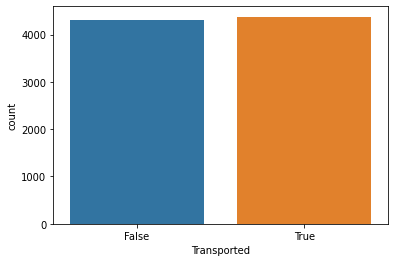

In [12]:
sns.countplot(x=y)

Let's deal first with the numeric missing data and apply feature engineering.

In [13]:
df.select_dtypes(include='float64').columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

<AxesSubplot:>

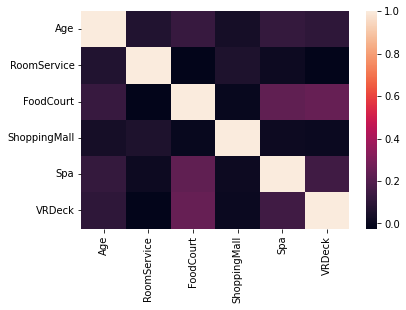

In [14]:
sns.heatmap(df.select_dtypes(include='float64').corr())

*feature: Age*

<AxesSubplot:xlabel='Age', ylabel='Count'>

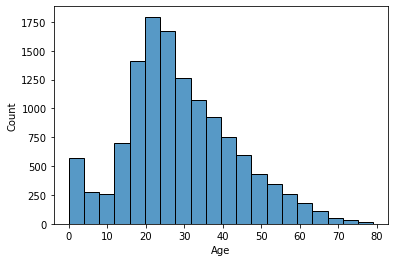

In [15]:
sns.histplot(data=df.Age, bins=20)

In [16]:
df.Age.describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

In [17]:
df.Age = df.Age.fillna(29.0)

*feature: [RoomService, FoodCourt, ShoppingMall, Spa, VRDeck]*

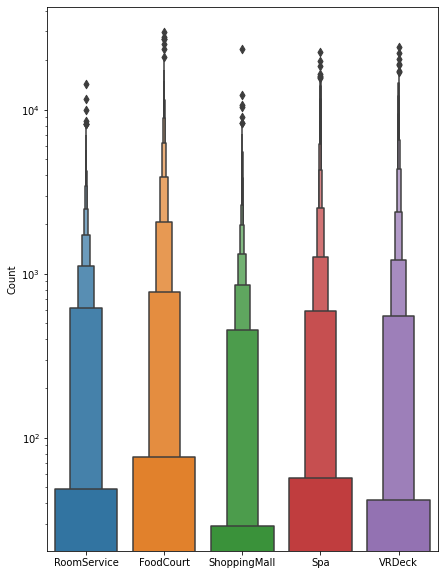

In [18]:
plt.figure(figsize=(7,10))
sns.boxenplot(data=df.drop(['CryoSleep','Age','VIP'],axis=1))
plt.ylabel('Count');
plt.yscale('log')

In [19]:
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

<AxesSubplot:xlabel='Age'>

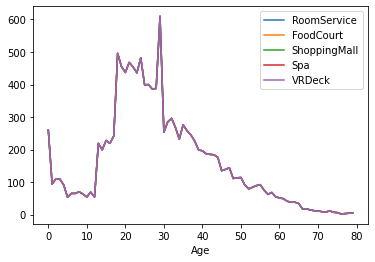

In [20]:
df.select_dtypes(include='float64').groupby('Age').count().plot()

Now we will deal with the categorical missing data and apply feature engineering.

In [21]:
df.select_dtypes(include='object').columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')

In [22]:
for i in list(df.select_dtypes(include='object').columns):
    uniques_list = df[i].unique()
    print(f'{i} has uniques {uniques_list}' )

HomePlanet has uniques ['Europa' 'Earth' 'Mars' nan]
CryoSleep has uniques [False True nan]
Cabin has uniques ['B/0/P' 'F/0/S' 'A/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
Destination has uniques ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP has uniques [False True nan]


<Figure size 3000x2000 with 0 Axes>

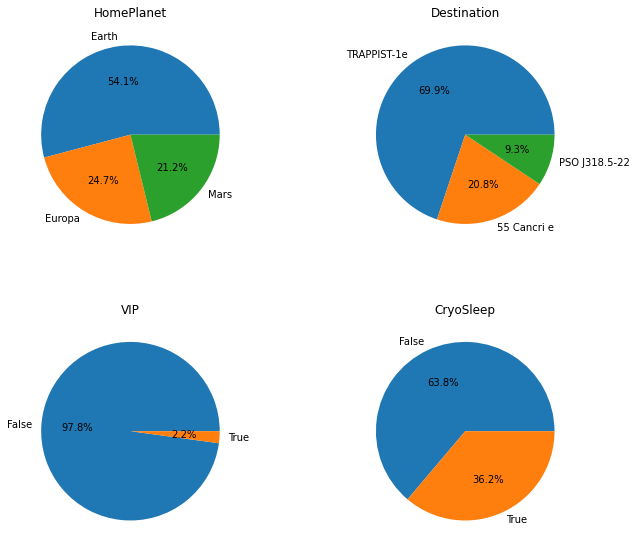

In [23]:
fig = plt.figure(dpi=500);
figure, ((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2, sharex=True, sharey=False, figsize=(10,10));
plt.subplots_adjust(wspace=0.5);
ax11.pie(df.HomePlanet.value_counts(),labels=df.HomePlanet.value_counts().index, autopct='%1.1f%%');
ax11.set_title('HomePlanet');
ax12.pie(df.Destination.value_counts(),labels=df.Destination.value_counts().index, autopct='%1.1f%%');
ax12.set_title('Destination');
ax21.pie(df.VIP.value_counts(),labels=df.VIP.value_counts().index, autopct='%1.1f%%');
ax21.set_title('VIP');
ax22.pie(df.CryoSleep.value_counts(),labels=df.CryoSleep.value_counts().index, autopct='%1.1f%%');
ax22.set_title('CryoSleep');

*feature: HomePlanet*

In [24]:
df.HomePlanet.value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [25]:
df.HomePlanet = df.HomePlanet.fillna(method='bfill', axis=0)

*feature: Destination*

In [26]:
df.Destination.value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [27]:
df.Destination = df.Destination.fillna(method='bfill', axis=0)

*feature: VIP*

In [28]:
def my_rand(p):
    n = np.random.rand()
    if n > (p-1):
        return False
    else:
        return True

In [29]:
df.VIP.value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [30]:
def choice(x):
    if x in [False, True]:
        return x
    else:
        p = my_rand(((273*100)/12401)/100)
        return p

In [31]:
df.VIP = df.apply(lambda x: choice(x.VIP), axis=1)

*feature: CryoSleep*

In [32]:
df.CryoSleep.value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [33]:
df.CryoSleep = df.CryoSleep.fillna(method='bfill', axis=0)

<Figure size 3000x2000 with 0 Axes>

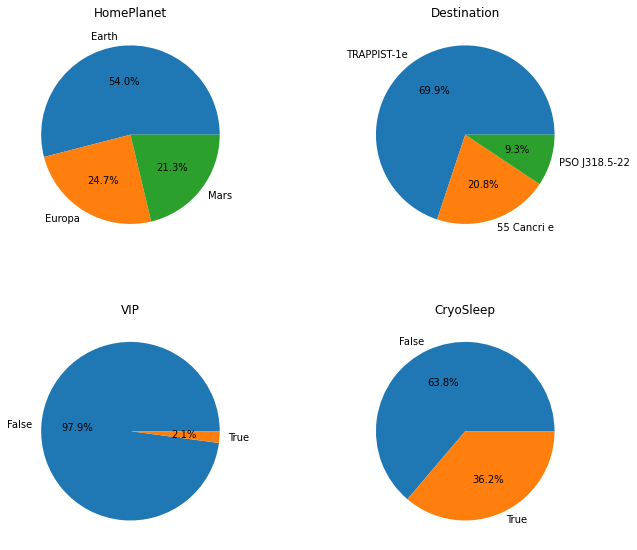

In [34]:
fig = plt.figure(dpi=500);
figure, ((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2, sharex=True, sharey=False, figsize=(10,10));
plt.subplots_adjust(wspace=0.5);
ax11.pie(df.HomePlanet.value_counts(),labels=df.HomePlanet.value_counts().index, autopct='%1.1f%%');
ax11.set_title('HomePlanet');
ax12.pie(df.Destination.value_counts(),labels=df.Destination.value_counts().index, autopct='%1.1f%%');
ax12.set_title('Destination');
ax21.pie(df.VIP.value_counts(),labels=df.VIP.value_counts().index, autopct='%1.1f%%');
ax21.set_title('VIP');
ax22.pie(df.CryoSleep.value_counts(),labels=df.CryoSleep.value_counts().index, autopct='%1.1f%%');
ax22.set_title('CryoSleep');

*feature: Cabin*

In [35]:
df.Cabin.value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

Since the number of unique values on the Cabin is so large, we will assume that it has the same role as the id feature from the data. Being uncorrelated to the prediction of the passenger being transported.

In [36]:
df = df.drop('Cabin', axis=1)

In [37]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [38]:
df.shape

(12970, 10)

In [39]:
df.select_dtypes(include=['bool','object']).columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')

# One-hot encoding #

In [40]:
dummies = pd.get_dummies(df[df.select_dtypes(include=['bool','object']).columns], drop_first=True, dtype=int)

In [41]:
df = df.drop(df.select_dtypes(include=['bool','object']).columns, axis=1)
df = pd.concat([df, dummies], axis=1)

In [42]:
df.shape

(12970, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        12970 non-null  float64
 1   RoomService                12970 non-null  float64
 2   FoodCourt                  12970 non-null  float64
 3   ShoppingMall               12970 non-null  float64
 4   Spa                        12970 non-null  float64
 5   VRDeck                     12970 non-null  float64
 6   CryoSleep                  12970 non-null  bool   
 7   VIP                        12970 non-null  bool   
 8   HomePlanet_Europa          12970 non-null  int64  
 9   HomePlanet_Mars            12970 non-null  int64  
 10  Destination_PSO J318.5-22  12970 non-null  int64  
 11  Destination_TRAPPIST-1e    12970 non-null  int64  
dtypes: bool(2), float64(6), int64(4)
memory usage: 1.1 MB


# Train Test Split #

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.iloc[:8693]
X_test = df.iloc[8693:]

In [46]:
X.shape

(8693, 12)

In [47]:
y.shape

(8693,)

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# Normalizing data #

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Creating the model (NN) # 

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

2023-10-05 15:12:23.735136: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
model = Sequential()

model.add(Dense(12, activation='relu', input_shape=[12],kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization(synchronized=True))
model.add(Dropout(0.1))
#model.add(Dense(12,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(5,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=0)

In [54]:
model.fit(X_train_scaled, y_train,
         verbose=1,
         batch_size=32,
         epochs=100,
         validation_data=[X_valid_scaled, y_valid],
         callbacks=[early_stop]
         )

Epoch 1/100


218/218 [==============================] - 2s 3ms/step - loss: 1.2350 - accuracy: 0.5800 - val_loss: 1.1328 - val_accuracy: 0.5819
Epoch 2/100
218/218 [==============================] - 0s 2ms/step - loss: 1.1599 - accuracy: 0.5997 - val_loss: 1.0927 - val_accuracy: 0.6222
Epoch 3/100
218/218 [==============================] - 0s 2ms/step - loss: 1.1008 - accuracy: 0.6260 - val_loss: 1.0425 - val_accuracy: 0.6527
Epoch 4/100
218/218 [==============================] - 1s 2ms/step - loss: 1.0471 - accuracy: 0.6434 - val_loss: 1.0002 - val_accuracy: 0.6820
Epoch 5/100
218/218 [==============================] - 0s 2ms/step - loss: 1.0120 - accuracy: 0.6565 - val_loss: 0.9655 - val_accuracy: 0.7004
Epoch 6/100
218/218 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.6780 - val_loss: 0.9350 - val_accuracy: 0.7079
Epoch 7/100
218/218 [==============================] - 0s 2ms/step - loss: 0.9437 - accuracy: 0.6782 - val_loss: 0.9085 - val_accuracy: 0.7200
Epoch 8/100

<AxesSubplot:>

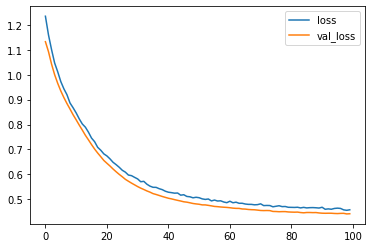

In [55]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [56]:
prob_pred = model.predict(X_valid_scaled)
predictions = (model.predict(X_valid_scaled) > 0.5).astype('int32')

55/55 [==============================] - 0s 779us/step


In [57]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay

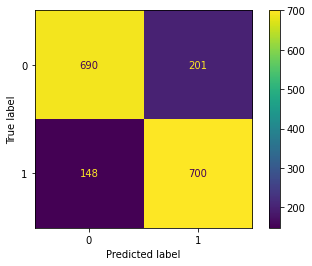

In [58]:
matrix =confusion_matrix(y_pred=predictions, y_true=y_valid)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()

In [59]:
print(classification_report(y_true=y_valid, y_pred=predictions))

              precision    recall  f1-score   support

       False       0.82      0.77      0.80       891
        True       0.78      0.83      0.80       848

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [60]:
prob_pred = model.predict(X_test_scaled)

134/134 [==============================] - 0s 801us/step


In [61]:
predictions = (prob_pred > 0.5 ).astype('bool')

In [62]:
submission = pd.DataFrame(index=test.PassengerId, data=predictions, columns=['Transported'])

In [63]:
submission.value_counts()

Transported
True           2354
False          1923
dtype: int64

In [64]:
submission.to_csv('submission.csv')

# Model XGB #

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

XBGmodel = XGBClassifier()

In [66]:
param_grid={'n_estimators':[10,100,200,150,300,400],
           'n_jobs':[2,4,6],
           'learning_rate':[0.3,1.0,1.5]}

In [67]:
# grid_model_XBG = GridSearchCV(estimator=XBGmodel,
#                           param_grid=param_grid,
#                          scoring='neg_mean_squared_error',
#                          cv=5,
#                          verbose=1)

In [68]:
# grid_model_XBG.fit(X_train, y_train)

In [69]:
# grid_model_XBG.best_params_

In [70]:
XBGmodel=XGBClassifier(n_estimators=10, learning_rate=0.3, n_jobs=2)
XBGmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=2, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

In [71]:
prediction_XBG = XBGmodel.predict(X_valid)

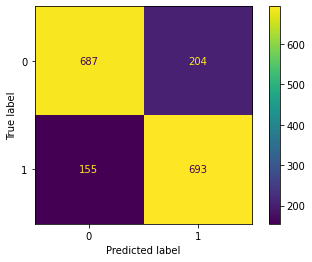

In [72]:
matrix = confusion_matrix(y_true=y_valid, y_pred=prediction_XBG )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [73]:
print(classification_report(y_true=y_valid, y_pred=prediction_XBG))

              precision    recall  f1-score   support

       False       0.82      0.77      0.79       891
        True       0.77      0.82      0.79       848

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [74]:
final_XBGmodel=XGBClassifier(n_estimators=10, learning_rate=0.3, n_jobs=2)
final_XBGmodel.fit(X_scaled, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=2, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

In [75]:
prediction_XBG_result = final_XBGmodel.predict(X_test_scaled)

In [76]:
prediction_XBG_result

array([1, 0, 1, ..., 1, 1, 0])

In [77]:
results_XBG = pd.DataFrame(index=test.PassengerId, data=prediction_XBG_result, columns=['outcome'])
results_XBG.value_counts()

outcome
1          2306
0          1971
dtype: int64

# Model Support Vector Machine #

In [78]:
from sklearn.svm import SVC

In [79]:
SVCmodel = SVC()

In [80]:
param_grid={'C':[0.5,1.0,10,100],
           'kernel':['rbf', 'sigmoid']}

In [81]:
grid_model = GridSearchCV(estimator=SVCmodel,
                          param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=1)

In [82]:
grid_model.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/util

In [83]:
grid_model.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [84]:
SVCmodel=SVC(C=0.5, kernel='rbf')
SVCmodel.fit(X_train, y_train)

SVC(C=0.5)

In [85]:
prediction_SVC = SVCmodel.predict(X_valid)

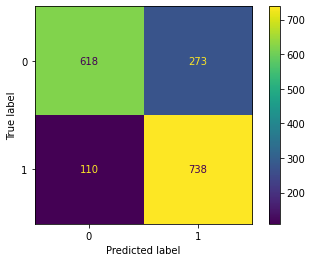

In [86]:
matrix = confusion_matrix(y_true=y_valid, y_pred=prediction_SVC )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [87]:
print(classification_report(y_true=y_valid, y_pred=prediction_SVC))

              precision    recall  f1-score   support

       False       0.85      0.69      0.76       891
        True       0.73      0.87      0.79       848

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



# Model AdaBoostClassifier #

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ABmodel = AdaBoostClassifier()

In [90]:
param_grid={'n_estimators':[10,100,200,150],
           'algorithm':['SAMME', 'SAMME.R'],
           'learning_rate':[0.3,1.0,1.5]}

In [91]:
grid_model = GridSearchCV(estimator=ABmodel,
                          param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=0)

In [92]:
grid_model.fit(X_train, y_train);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/util

In [93]:
grid_model.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 10}

In [94]:
ABmodel= AdaBoostClassifier(algorithm = 'SAMME', learning_rate=0.3, n_estimators=10)
ABmodel.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.3, n_estimators=10)

In [95]:
prediction_AB = ABmodel.predict(X_valid)

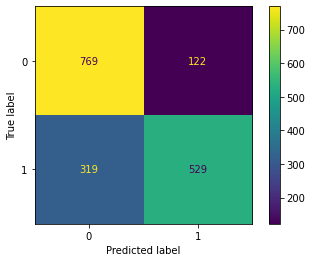

In [96]:
matrix = confusion_matrix(y_true=y_valid, y_pred=prediction_AB )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [97]:
print(classification_report(y_true=y_valid, y_pred=prediction_AB))

              precision    recall  f1-score   support

       False       0.71      0.86      0.78       891
        True       0.81      0.62      0.71       848

    accuracy                           0.75      1739
   macro avg       0.76      0.74      0.74      1739
weighted avg       0.76      0.75      0.74      1739

